# Calories

## Importing the data

In [1]:
import csv

with open('tri_health_data.csv') as csvfile:
    reader = csv.reader(csvfile, skipinitialspace=True)
    for row in reader:
        print(row)


['Date', 'Sleep', 'Sleep Quality', 'Activity Type', 'Activity Duration', 'TSS', 'Weight', 'HRV', 'Steps', 'Cals_burnt', 'Cals', 'Carbs', 'Fats', 'Protein', 'Sensation']
['22/05/2017', '7.1', 'Good sleep, low TSS.', 'Swim, Run', '125', '154', '87.7', '', '13894', '4600', '3600', '481', '102', '135', '7']
['23/05/2017', '6.3', 'Poor sleep, low TSS.', 'Swim', '45', '78', '', '', '12739', '3459', '3700', '413', '100', '75', '4']
['24/05/2017', '6.7', 'Poor sleep, low TSS.', '', '', '0', '', '', '3324', '1629', '2210', '305', '42', '75', '8']
['25/05/2017', '7.6', 'Good sleep, low TSS.', 'Swim, Gym', '142', '155', '', '', '11532', '4327', '4580', '392', '89', '175', '7']
['26/05/2017', '8.7', 'Good sleep, low TSS.', 'Run', '68', '60', '', '', '10479', '3363', '3590', '510', '61', '80', '9']
['27/05/2017', '6.5', 'Poor sleep, low TSS.', 'Run, Bike', '95', '61', '87.5', '', '5475', '2292', '2220', '402', '62', '80', '4']
['28/05/2017', '8.1', 'Good sleep, low TSS.', 'Gym', '60', '67', '', '',

In [427]:
import pandas as pd

df = pd.read_csv('tri_health_data.csv')
df.head(5)

,Date,Sleep,Activity Type,Activity Duration,TSS,Weight,HRV,Steps,Cals_burnt,Cals,Carbs,Fats,Protein,Sensation
0,22/05/2017,7.1,"Swim, Run",125.0,154,87.7,NaN,13894.0,4600.0,3600.0,481.0,102.0,135.0,7.0
1,23/05/2017,6.3,Swim,45.0,78,NaN,NaN,12739.0,3459.0,3700.0,413.0,100.0,75.0,4.0
2,24/05/2017,6.7,NaN,NaN,0,NaN,NaN,3324.0,2629.0,2210.0,305.0,42.0,75.0,8.0
3,25/05/2017,7.6,"Swim, Gym",142.0,155,NaN,NaN,11532.0,4327.0,4580.0,392.0,89.0,175.0,7.0
4,26/05/2017,8.7,Run,68.0,60,NaN,NaN,10479.0,3363.0,3590.0,510.0,61.0,80.0,9.0


In [419]:
df.size

14476

In [224]:
df.shape

(1034, 14)

In [225]:
countoftimetraining = df['Activity Duration'].sum()
days = round(countoftimetraining/(60*24),1)

print(f"Wow you have exercised {countoftimetraining} mins or {days} days!!")

Wow you have exercised 65746.0 mins or 45.7 days!!


<AxesSubplot:xlabel='Cals_burnt', ylabel='TSS'>

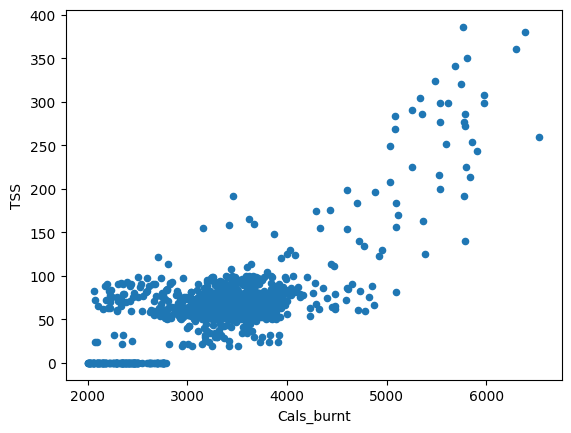

In [226]:
df.plot.scatter("Cals_burnt","TSS")

<AxesSubplot:xlabel='Sleep', ylabel='Sensation'>

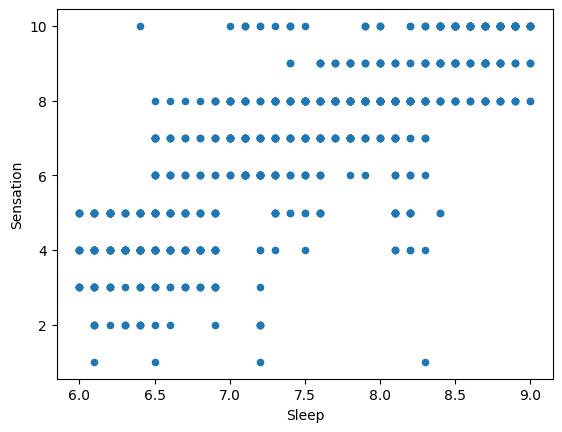

In [227]:
df.plot.scatter("Sleep","Sensation")

In [228]:
column_titles = list(df.columns)
column_titles

['Date',
 'Sleep',
 'Activity Type',
 'Activity Duration',
 'TSS',
 'Weight',
 'HRV',
 'Steps',
 'Cals_burnt',
 'Cals',
 'Carbs',
 'Fats',
 'Protein',
 'Sensation']

# Preparing the DataSet

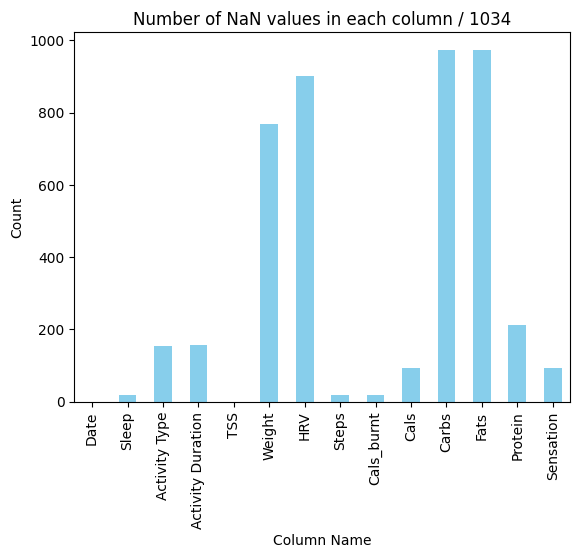

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Count the NaN values for each column
nan_counts = df.isna().sum()
count_date = df['Date'].count()

# Plotting the NaN counts
nan_counts.plot(kind='bar', color='skyblue')
plt.title(f'Number of NaN values in each column / {count_date}')
plt.ylabel('Count')
plt.xlabel('Column Name')
plt.show()


In [230]:
nan_count_weight = df['Weight'].isna().sum()
nan_count_weight

768

In [231]:

df.drop(columns=['Fats','Carbs','HRV'], inplace=True)
df




,Date,Sleep,Activity Type,Activity Duration,TSS,Weight,Steps,Cals_burnt,Cals,Protein,Sensation
0,22/05/2017,7.1,"Swim, Run",125.0,154,87.7,13894.0,4600.0,3600.0,135.0,7.0
1,23/05/2017,6.3,Swim,45.0,78,NaN,12739.0,3459.0,3700.0,75.0,4.0
2,24/05/2017,6.7,NaN,NaN,0,NaN,3324.0,2629.0,2210.0,75.0,8.0
3,25/05/2017,7.6,"Swim, Gym",142.0,155,NaN,11532.0,4327.0,4580.0,175.0,7.0
4,26/05/2017,8.7,Run,68.0,60,NaN,10479.0,3363.0,3590.0,80.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
1029,16/03/2020,8.0,Swim,60.0,60,NaN,11490.0,3414.0,3250.0,75.0,10.0
1030,17/03/2020,8.1,Swim,60.0,67,NaN,11011.0,3405.0,2870.0,75.0,8.0
1031,18/03/2020,6.6,NaN,NaN,0,NaN,6475.0,2091.0,1790.0,80.0,6.0
1032,19/03/2020,8.4,"Swim, Run",60.0,68,90.6,11595.0,3543.0,3780.0,80.0,9.0


In [232]:
column_titles = list(df.columns)
column_titles

['Date',
 'Sleep',
 'Activity Type',
 'Activity Duration',
 'TSS',
 'Weight',
 'Steps',
 'Cals_burnt',
 'Cals',
 'Protein',
 'Sensation']

<AxesSubplot:xlabel='Cals'>

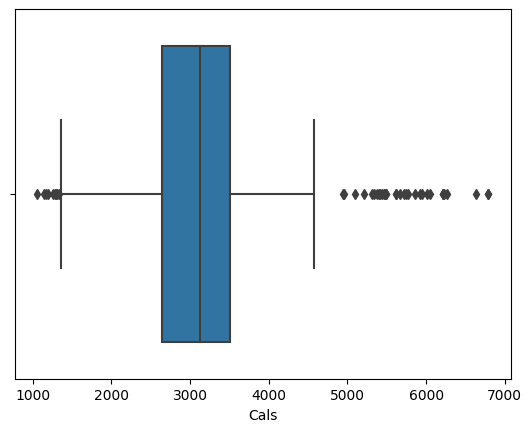

In [233]:
import seaborn as sns

sns.boxplot(data=df, x='Cals')

In [428]:

#auto filling in the gaps between me weighing myself 

df['Weight'].fillna(method='ffill', inplace=True)
df['Weight']


0       87.7
1       87.7
2       87.7
3       87.7
4       87.7
        ... 
1029    90.6
1030    90.6
1031    90.6
1032    90.6
1033    90.6
Name: Weight, Length: 1034, dtype: float64

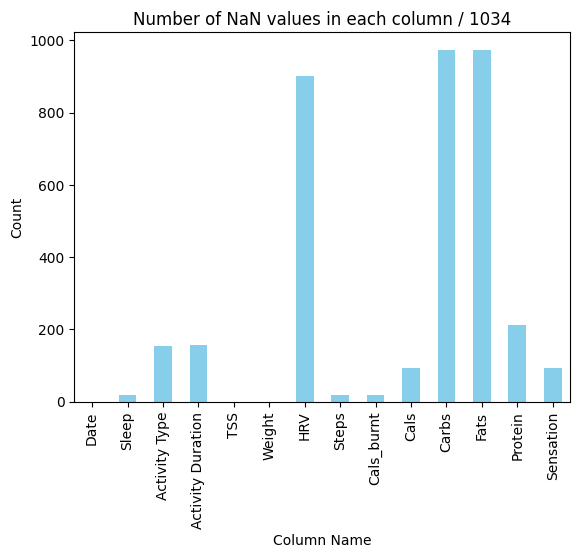

In [429]:
# Count the NaN values for each column
nan_counts = df.isna().sum()
count_date = df['Date'].count()

# Plotting the NaN counts
nan_counts.plot(kind='bar', color='skyblue')
plt.title(f'Number of NaN values in each column / {count_date}')
plt.ylabel('Count')
plt.xlabel('Column Name')
plt.show()

In [236]:
medium_protein = df['Protein'].median()
medium_protein

#i feel this is a typical score for an average day - fair reflection

80.0

In [237]:
df['Protein'].fillna(value=80, inplace=True)
df['Protein']

0       135.0
1        75.0
2        75.0
3       175.0
4        80.0
        ...  
1029     75.0
1030     75.0
1031     80.0
1032     80.0
1033     80.0
Name: Protein, Length: 1034, dtype: float64

In [238]:
np = df['Protein'].isna().sum()
np

0

In [239]:
df=df.dropna(subset=['Sleep'])
df.count()

Date                 1016
Sleep                1016
Activity Type         867
Activity Duration     865
TSS                  1016
Weight               1016
Steps                1016
Cals_burnt           1016
Cals                  941
Protein              1016
Sensation             941
dtype: int64

In [240]:
q3 = df['Cals'].quantile(0.75)
q3

# i feel this is specific to me as i do binge when i dont exercise, feel a sense of eating through lazieness
#therefore i would not put this in a pipeline as could be speific to each person i.e. some may eat far less when not training

3510.0

In [241]:
summary = df['Sensation'].describe()
summary

count    941.000000
mean       6.850159
std        2.214525
min        1.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: Sensation, dtype: float64

In [242]:
df['Cals'].fillna(value=df['Cals'].quantile(0.75), inplace=True)
df['Sensation'].fillna(value=df['Sensation'].mean(), inplace=True)
df.count()

/tmp/ipykernel_466/3179250582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cals'].fillna(value=df['Cals'].quantile(0.75), inplace=True)
/tmp/ipykernel_466/3179250582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sensation'].fillna(value=df['Sensation'].mean(), inplace=True)


Date                 1016
Sleep                1016
Activity Type         867
Activity Duration     865
TSS                  1016
Weight               1016
Steps                1016
Cals_burnt           1016
Cals                 1016
Protein              1016
Sensation            1016
dtype: int64

In [243]:
missing2rows = df[df['Activity Duration'].isna() & ~df['Activity Type'].isna()]
missing2rows

# i am happy with the missing data for activity types as simply means i did not train that day. 
# whereas i would like to remove the two days i did but not count the duration which i feel could be siginificant for modelling

,Date,Sleep,Activity Type,Activity Duration,TSS,Weight,Steps,Cals_burnt,Cals,Protein,Sensation
237,14/01/2018,8.9,"Swim, Run",NaN,0,89.8,3693.0,2025.0,2130.0,80.0,9.0
251,28/01/2018,6.4,"Swim, Gym",NaN,0,89.9,4405.0,2752.0,1480.0,75.0,4.0


In [244]:
df = df.drop([237, 251])
df

,Date,Sleep,Activity Type,Activity Duration,TSS,Weight,Steps,Cals_burnt,Cals,Protein,Sensation
0,22/05/2017,7.1,"Swim, Run",125.0,154,87.7,13894.0,4600.0,3600.0,135.0,7.0
1,23/05/2017,6.3,Swim,45.0,78,87.7,12739.0,3459.0,3700.0,75.0,4.0
2,24/05/2017,6.7,NaN,NaN,0,87.7,3324.0,2629.0,2210.0,75.0,8.0
3,25/05/2017,7.6,"Swim, Gym",142.0,155,87.7,11532.0,4327.0,4580.0,175.0,7.0
4,26/05/2017,8.7,Run,68.0,60,87.7,10479.0,3363.0,3590.0,80.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
1029,16/03/2020,8.0,Swim,60.0,60,90.6,11490.0,3414.0,3250.0,75.0,10.0
1030,17/03/2020,8.1,Swim,60.0,67,90.6,11011.0,3405.0,2870.0,75.0,8.0
1031,18/03/2020,6.6,NaN,NaN,0,90.6,6475.0,2091.0,1790.0,80.0,6.0
1032,19/03/2020,8.4,"Swim, Run",60.0,68,90.6,11595.0,3543.0,3780.0,80.0,9.0


In [245]:
# check any duplicated values

df.duplicated().sum()

0

In [246]:
df[df['Cals_burnt']<=2000]

,Date,Sleep,Activity Type,Activity Duration,TSS,Weight,Steps,Cals_burnt,Cals,Protein,Sensation


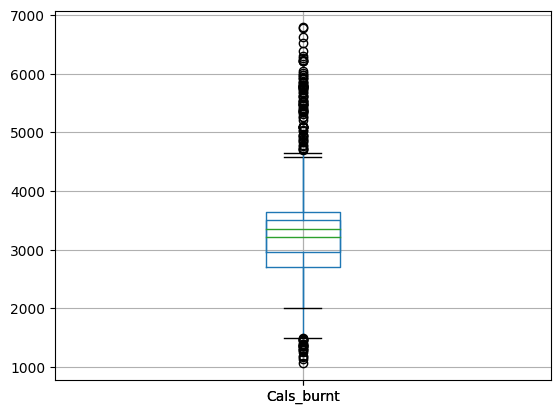

In [247]:
df[['Cals']].boxplot();
df[['Cals_burnt']].boxplot();

## Create Training and Test Set

In [248]:
# Prevent Data Leakage: If you scale the entire dataset before splitting into training and test sets, information from the test set will be used to determine the scaling factors (e.g., min, max, median, IQR). This can lead to data leakage, where the model has indirect access to the test set information during training. Data leakage can result in over-optimistic performance evaluations.

In [249]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = df[['Sleep','Weight', 'Cals_burnt','Steps','TSS','Sensation', 'Activity Duration', 'Protein']]
y = df['Cals']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    ) # Holdout random_state = 6





In [250]:
y_train

898     3380.0
1024    1850.0
493     3820.0
731     3490.0
561     3410.0
         ...  
198     2250.0
1007    3650.0
379     3510.0
869     3990.0
55      3300.0
Name: Cals, Length: 709, dtype: float64

In [220]:
#do feature permutation
#do balancing on run swim etc when doing activity machine learning


## Scaling

### Steps

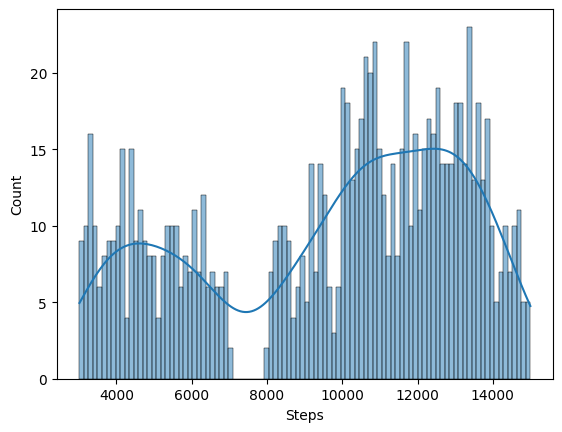

In [190]:
import seaborn as sns
sns.histplot(df['Steps'], bins=100,kde = True);
#df[['Steps']].boxplot();

# therefore pick min max 

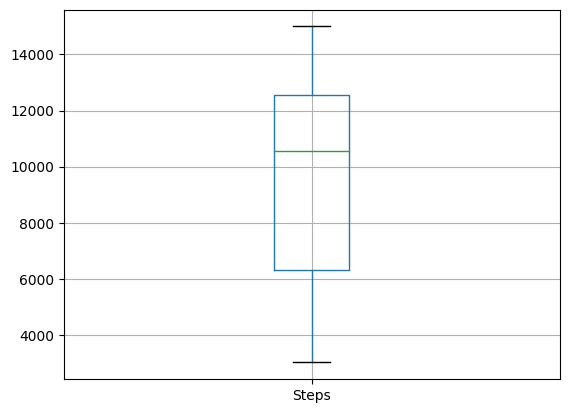

In [128]:
df[['Steps']].boxplot();

### Sleep

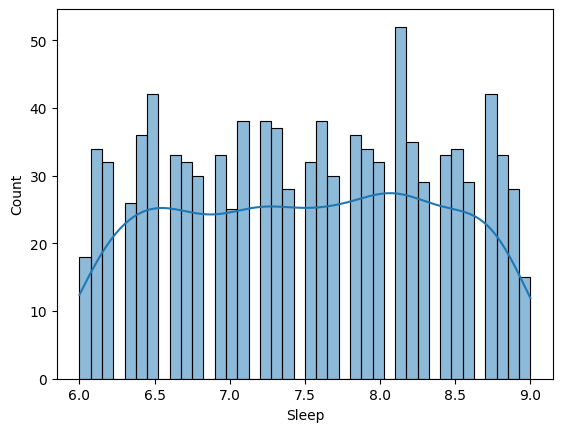

In [129]:
sns.histplot(df['Sleep'], bins=40,kde = True);

# min max would work

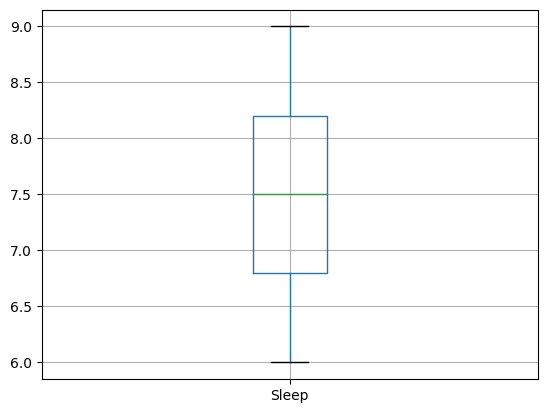

In [130]:
df[['Sleep']].boxplot();

### TSS

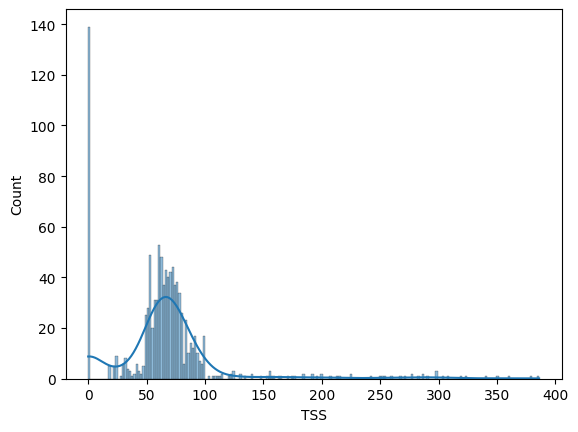

In [131]:
sns.histplot(df['TSS'], bins=200,kde = True);

#robust

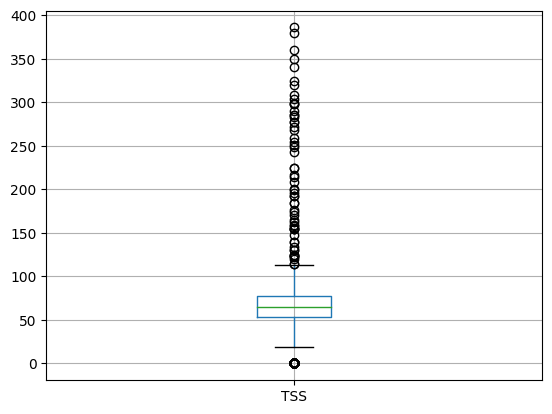

In [132]:
df[['TSS']].boxplot();

### Cals

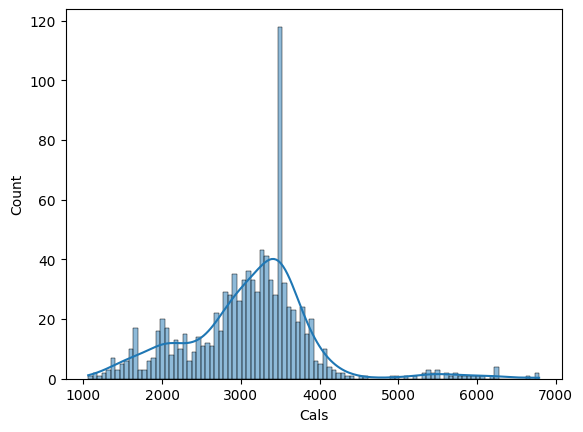

In [133]:
sns.histplot(df['Cals'], bins=100,kde = True);

#robust

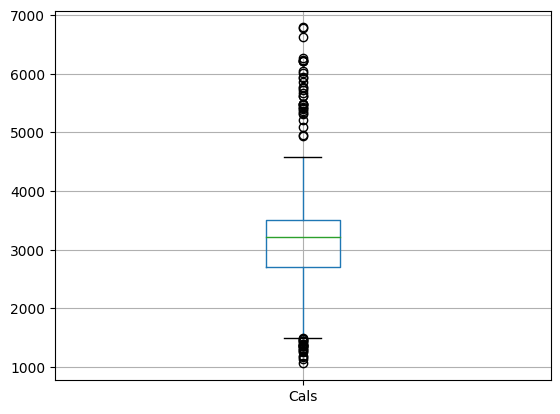

In [134]:
df[['Cals']].boxplot();

### Cals_burnt

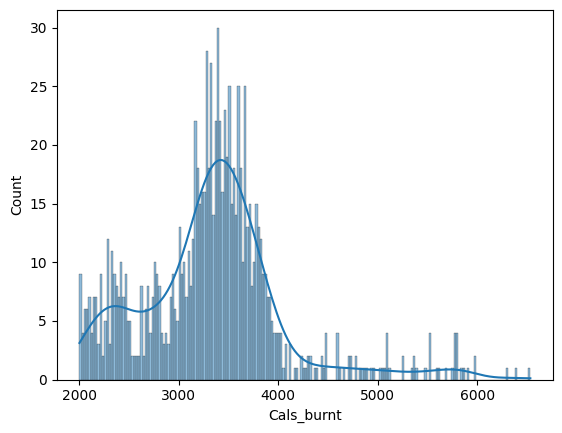

In [135]:
sns.histplot(df['Cals_burnt'], bins=200,kde = True);

# Robust witht he outliers

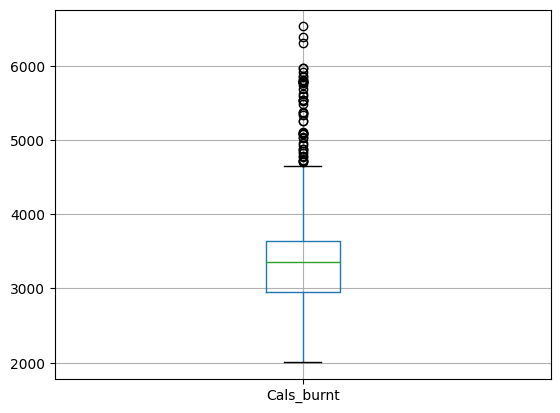

In [136]:
df[['Cals_burnt']].boxplot();

### Protein 

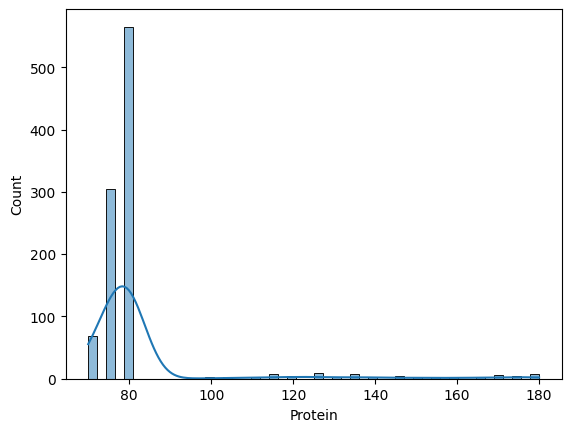

In [137]:
sns.histplot(df['Protein'], bins=50,kde = True);

# robust

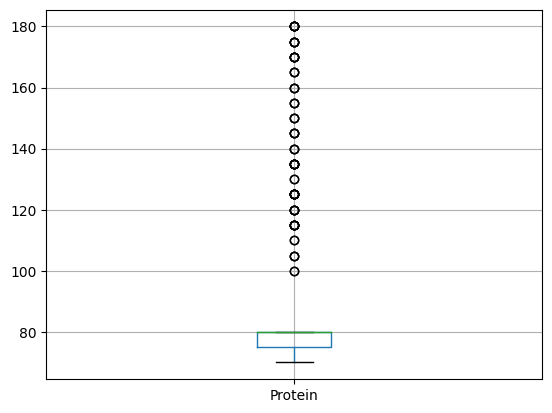

In [138]:
df[['Protein']].boxplot();

### Sensation

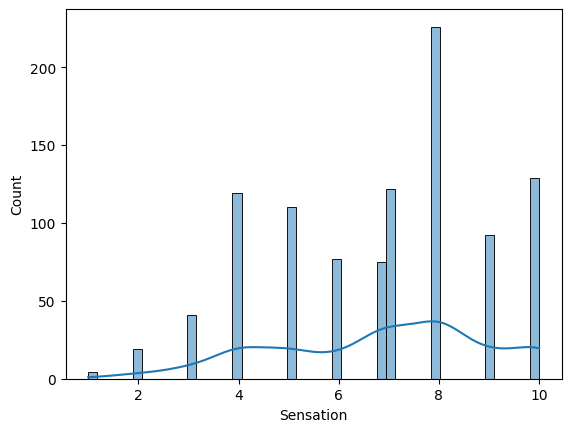

In [139]:
sns.histplot(df['Sensation'], bins=50,kde = True);

# therefore minmax would work

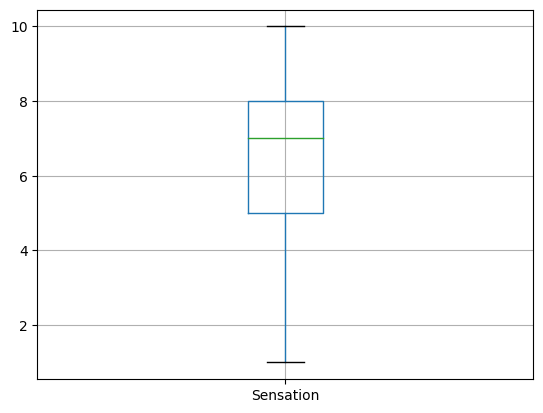

In [140]:
df[['Sensation']].boxplot();

### Weight

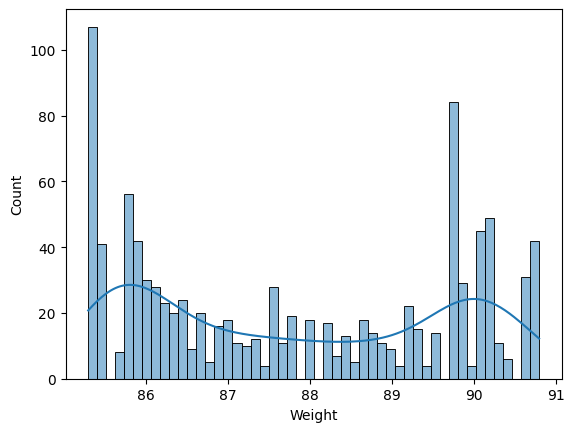

In [141]:
sns.histplot(df['Weight'], bins=50,kde = True);

# therefore minmax would work

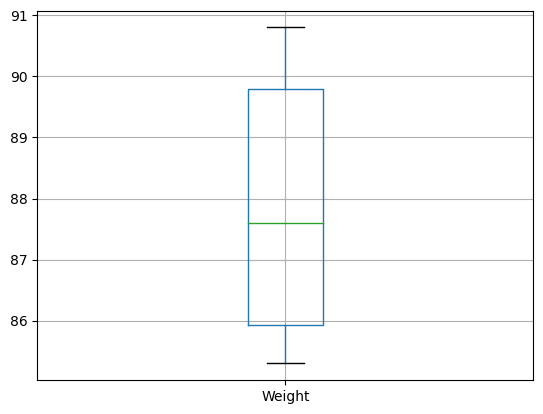

In [142]:
df[['Weight']].boxplot();

### Activity Duration

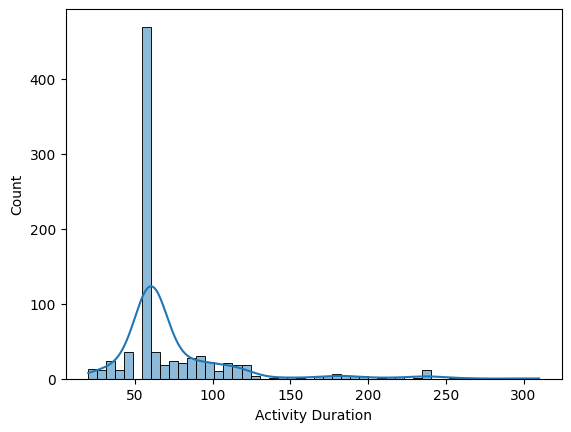

In [143]:
sns.histplot(df['Activity Duration'], bins=50,kde = True);

# therefore minmax would work

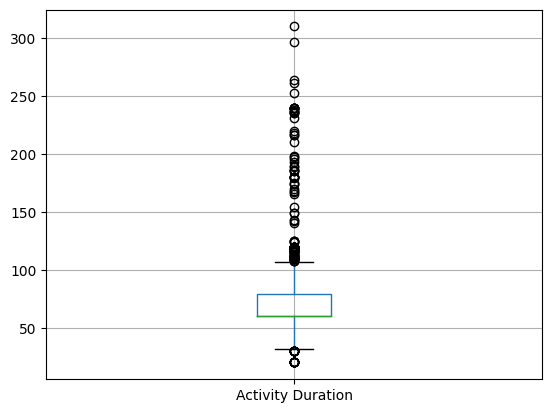

In [144]:
df[['Activity Duration']].boxplot();

### Applying the Scaling

In [252]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# MinMax Scaling
minmax_scaler = MinMaxScaler()
X_train[['Steps', 'Sleep','Weight', 'Sensation']] = minmax_scaler.fit_transform(X_train[['Steps','Weight', 'Sleep', 'Sensation']])

# Robust Scaling
robust_scaler = RobustScaler()
X_train[['TSS', 'Cals_burnt', 'Protein','Activity Duration']] = robust_scaler.fit_transform(X_train[['TSS', 'Cals_burnt', 'Protein', 'Activity Duration']])

X_train

,Sleep,Weight,Cals_burnt,Steps,TSS,Sensation,Activity Duration,Protein
898,1.000000,0.309091,-1.233748,0.014109,-2.500000,0.888889,NaN,0.0
1024,0.166667,0.981818,-1.366528,0.164719,-2.500000,0.666667,NaN,-1.0
493,0.933333,0.018182,0.410788,0.773084,-0.269231,1.000000,0.0,-1.0
731,0.300000,0.527273,0.136929,0.829604,-0.346154,0.222222,0.0,-2.0
561,0.566667,0.545455,0.157676,0.766405,-0.346154,0.777778,0.0,0.0
...,...,...,...,...,...,...,...,...
198,0.800000,0.581818,-1.622407,0.180414,-2.500000,1.000000,NaN,0.0
1007,0.566667,0.963636,0.149378,0.617298,1.346154,0.777778,0.7,13.0
379,0.200000,0.309091,-0.738589,0.451661,0.230769,0.650018,0.0,0.0
869,1.000000,0.127273,0.514523,0.728836,0.576923,1.000000,0.0,0.0


### Feature Correlation

<AxesSubplot:>

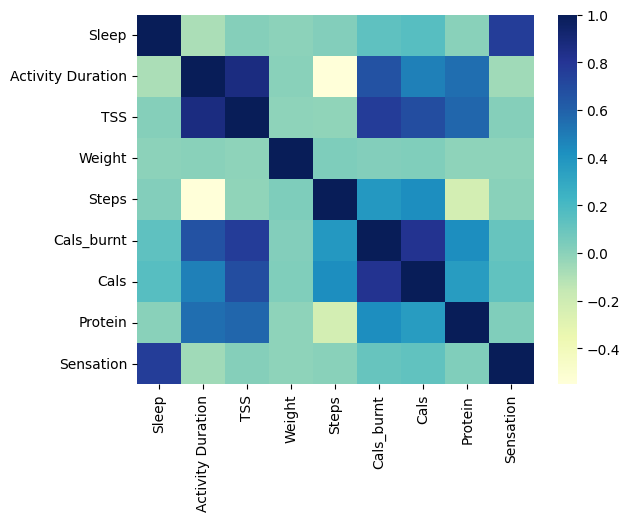

In [286]:
import seaborn as sns

# Heatmap of pairwise correlations
corr = df.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns,
           yticklabels=corr.columns,
           cmap = "YlGnBu")
#column_names = correlation_matrix.columns
#sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [417]:
corr = corr.unstack().reset_index()
corr.columns = ['feature_1','feature_2', 'correlation']
corr.sort_values(by='correlation',ascending=False, inplace=True)
corr = corr[corr['feature_1'] != corr['feature_2']]

corr

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
# 1. Drop the columns 'Fats', 'Carbs', and 'HRV'.
df.drop(columns=['Fats', 'Carbs', 'HRV'], inplace=True)

# 2. Forward-fill the missing values in the 'Weight' column.
df['Weight'].fillna(method='ffill', inplace=True)

# 3. Fill the missing values in the 'Protein' column with its median, or with 80 if the median is NaN.
protein_median = df['Protein'].median()
if pd.isna(protein_median):
    df['Protein'].fillna(value=80, inplace=True)
else:
    df['Protein'].fillna(value=protein_median, inplace=True)

# 4. Fill any missing values in the 'Cals' column with its 75th percentile value.
df['Cals'].fillna(value=df['Cals'].quantile(0.75), inplace=True)

# 5. Fill any missing values in the 'Sensation' column with its mean value.
df['Sensation'].fillna(value=df['Sensation'].mean(), inplace=True)

# 6. Identify and drop rows where 'Activity Duration' is NaN but 'Activity Type' is not NaN.
rows_to_drop = df[df['Activity Duration'].isna() & ~df['Activity Type'].isna()].index
rows_dropped_count = len(rows_to_drop)
df.drop(rows_to_drop, inplace=True)

rows_dropped_count

In [2]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove the 'Date' column from categorical columns as it won't be used in modeling
if 'Date' in categorical_cols:
    categorical_cols.remove('Date')

# Display summary statistics for numeric columns to decide on scaling method
df[numeric_cols].describe()

NameError: name 'df' is not defined

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# Define the transformers in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create and fit the preprocessing pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Transform the data using the pipeline
df_transformed = pipeline.fit_transform(df)

# Convert the transformed data back to DataFrame for better readability
columns_transformed = numeric_cols + pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols).tolist()
df_transformed = pd.DataFrame(df_transformed, columns=columns_transformed)

df_transformed.head()

NameError: name 'numeric_cols' is not defined

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

# Columns that require robust scaling
robust_cols = ['Activity Duration', 'TSS', 'Steps', 'Cals_burnt']

# Columns that require standard scaling
standard_cols = [col for col in numeric_cols if col not in robust_cols and col != 'Cals']  # 'Cals' is our target

# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Date')  # Removing 'Date' as it won't be used in modeling

# Creating transformers
transformers = [
    ('robust', RobustScaler(), robust_cols),
    ('standard', StandardScaler(), standard_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
]

# Building the column transformer
preprocessor = ColumnTransformer(transformers)

# Displaying the categorical columns for reference
categorical_cols

In [ ]:
# Splitting the data into features and target
X = df.drop(columns=['Cals', 'Date'])  # Removing 'Date' and target column 'Cals'
y = df['Cals']

# Fitting and transforming the data using the preprocessor
X_transformed = preprocessor.fit_transform(X)

# Converting transformed data back to dataframe for easier handling in next steps
columns_after_transform = (robust_cols + standard_cols + 
                           list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)))
X_transform

# Time Series Approach 

In [430]:
df

,Date,Sleep,Activity Type,Activity Duration,TSS,Weight,HRV,Steps,Cals_burnt,Cals,Carbs,Fats,Protein,Sensation
0,22/05/2017,7.1,"Swim, Run",125.0,154,87.7,NaN,13894.0,4600.0,3600.0,481.0,102.0,135.0,7.0
1,23/05/2017,6.3,Swim,45.0,78,87.7,NaN,12739.0,3459.0,3700.0,413.0,100.0,75.0,4.0
2,24/05/2017,6.7,NaN,NaN,0,87.7,NaN,3324.0,2629.0,2210.0,305.0,42.0,75.0,8.0
3,25/05/2017,7.6,"Swim, Gym",142.0,155,87.7,NaN,11532.0,4327.0,4580.0,392.0,89.0,175.0,7.0
4,26/05/2017,8.7,Run,68.0,60,87.7,NaN,10479.0,3363.0,3590.0,510.0,61.0,80.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,16/03/2020,8.0,Swim,60.0,60,90.6,NaN,11490.0,3414.0,3250.0,NaN,NaN,75.0,10.0
1030,17/03/2020,8.1,Swim,60.0,67,90.6,NaN,11011.0,3405.0,2870.0,NaN,NaN,75.0,8.0
1031,18/03/2020,6.6,NaN,NaN,0,90.6,NaN,6475.0,2091.0,1790.0,NaN,NaN,80.0,6.0
1032,19/03/2020,8.4,"Swim, Run",60.0,68,90.6,NaN,11595.0,3543.0,3780.0,NaN,NaN,80.0,9.0


<AxesSubplot:xlabel='Date', ylabel='Weight'>

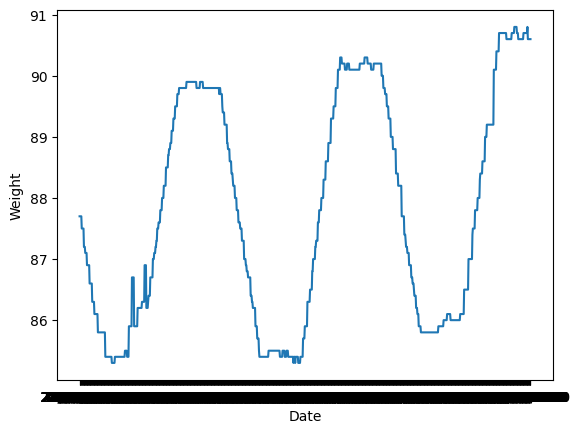

In [431]:
sns.lineplot(data=df['Weight'], x=df['Date'], y=df['Weight'])


In [432]:
weightdf = df[['Date','Weight']]
weightdf['Date'] =pd.to_datetime(weightdf['Date'], infer_datetime_format=True)
weightdf.set_index('Date', inplace=True)
weightdf

/tmp/ipykernel_466/2878114855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weightdf['Date'] =pd.to_datetime(weightdf['Date'], infer_datetime_format=True)


,Weight
Date,
2017-05-22,87.7
2017-05-23,87.7
2017-05-24,87.7
2017-05-25,87.7
2017-05-26,87.7
...,...
2020-03-16,90.6
2020-03-17,90.6
2020-03-18,90.6


In [433]:
anyna= weightdf.isna().sum()

anyna

Weight    0
dtype: int64

# Train data Set

In [434]:
train_size = 0.7
index = round(train_size*weightdf.shape[0])

weightdf_train = weightdf.iloc[:index]
weightdf_test = weightdf.iloc[index:]

In [435]:
wdf2 = weightdf.copy(); wdf2_train = weightdf_train.copy(); wdf2_test = weightdf_test.copy()

for i in range(1,12):
    wdf2_train[f'Day-{i}'] = weightdf_train['Weight'].shift(i)
    wdf2_test[f'Day-{i}'] = weightdf_test['Weight'].shift(i)
    
wdf2_train.dropna(inplace=True)
wdf2_test.dropna(inplace=True)
wdf2_train

,Weight,Day-1,Day-2,Day-3,Day-4,Day-5,Day-6,Day-7,Day-8,Day-9,Day-10,Day-11
Date,,,,,,,,,,,,
2017-06-02,87.2,87.2,87.5,87.5,87.5,87.5,87.5,87.7,87.7,87.7,87.7,87.7
2017-06-03,87.2,87.2,87.2,87.5,87.5,87.5,87.5,87.5,87.7,87.7,87.7,87.7
2017-06-04,87.1,87.2,87.2,87.2,87.5,87.5,87.5,87.5,87.5,87.7,87.7,87.7
2017-06-05,87.1,87.1,87.2,87.2,87.2,87.5,87.5,87.5,87.5,87.5,87.7,87.7
2017-06-06,87.1,87.1,87.1,87.2,87.2,87.2,87.5,87.5,87.5,87.5,87.5,87.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-11,88.8,88.8,89.0,89.0,89.0,89.0,89.0,89.3,89.3,89.3,89.3,89.3
2019-05-12,88.8,88.8,88.8,89.0,89.0,89.0,89.0,89.0,89.3,89.3,89.3,89.3
2019-05-13,88.8,88.8,88.8,88.8,89.0,89.0,89.0,89.0,89.0,89.3,89.3,89.3


In [436]:
# Train Test Split but with a Y 

x2_train = wdf2_train.drop(columns = ['Weight'])
y2_train = wdf2_train['Weight']
x2_test = wdf2_test.drop(columns = ['Weight'])
y2_test = wdf2_test['Weight']

print(x2_train.shape, y2_train.shape, x2_test.shape, y2_test.shape)

(713, 11) (713,) (299, 11) (299,)


In [445]:
x2_test

,Day-1,Day-2,Day-3,Day-4,Day-5,Day-6,Day-7,Day-8,Day-9,Day-10,Day-11
Date,,,,,,,,,,,
2019-05-27,88.2,88.2,88.2,88.2,88.2,88.4,88.4,88.4,88.4,88.4,88.8
2019-05-28,88.2,88.2,88.2,88.2,88.2,88.2,88.4,88.4,88.4,88.4,88.4
2019-05-29,88.2,88.2,88.2,88.2,88.2,88.2,88.2,88.4,88.4,88.4,88.4
2019-05-30,88.2,88.2,88.2,88.2,88.2,88.2,88.2,88.2,88.4,88.4,88.4
2019-05-31,87.7,88.2,88.2,88.2,88.2,88.2,88.2,88.2,88.2,88.4,88.4
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-16,90.6,90.6,90.8,90.7,90.7,90.7,90.7,90.7,90.7,90.7,90.7
2020-03-17,90.6,90.6,90.6,90.8,90.7,90.7,90.7,90.7,90.7,90.7,90.7
2020-03-18,90.6,90.6,90.6,90.6,90.8,90.7,90.7,90.7,90.7,90.7,90.7


In [446]:
y2_test

Date
2019-05-27    88.2
2019-05-28    88.2
2019-05-29    88.2
2019-05-30    87.7
2019-05-31    87.7
              ... 
2020-03-16    90.6
2020-03-17    90.6
2020-03-18    90.6
2020-03-19    90.6
2020-03-20    90.6
Name: Weight, Length: 299, dtype: float64

## Predict and measure R2

R2: 0.9978108805654478


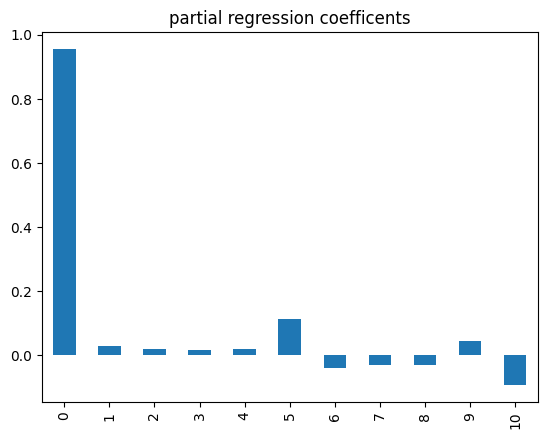

In [437]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model = model.fit(x2_train, y2_train)

print('R2:', r2_score(y2_test, model.predict(x2_test)))
pd.Series(model.coef_).plot(kind='bar')
plt.title('partial regression coefficents');

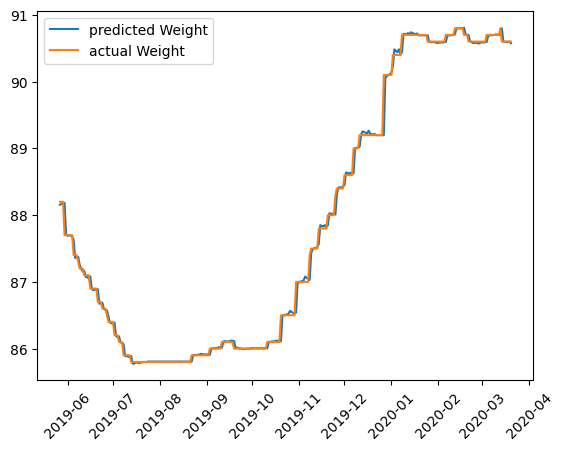

In [450]:
pred=model.predict(x2_test)

plt.plot(y2_test.index, pred, label='predicted Weight')
plt.plot(y2_test.index, y2_test, label='actual Weight')
plt.legend(loc='upper left')
plt.xticks(rotation=45) 
plt.show()

## Decomposition

In [438]:
from statsmodels.tsa.seasonal import seasonal_decompose

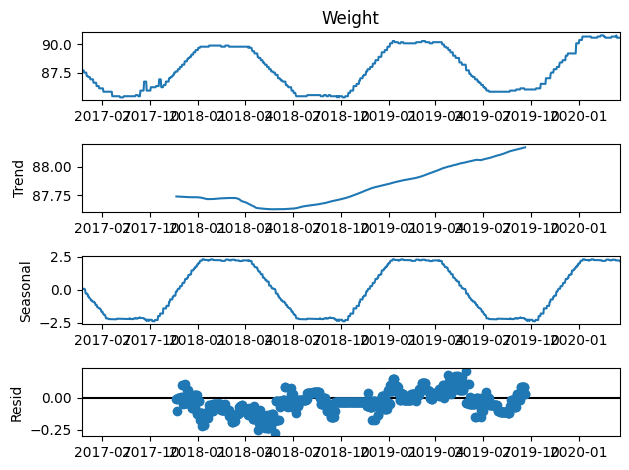

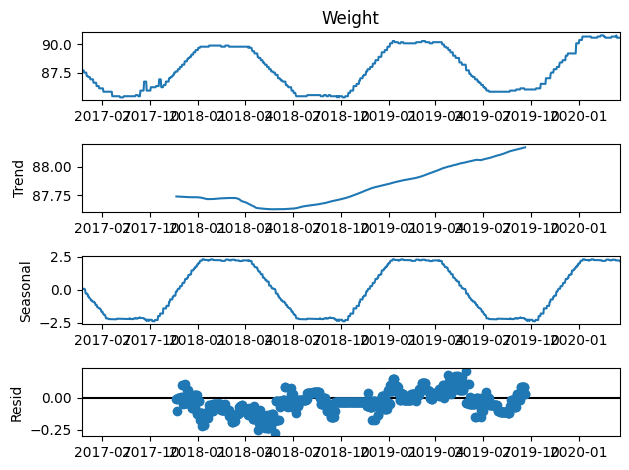

In [443]:
result_add = seasonal_decompose(weightdf['Weight'], model='addictive', period=365)
result_add.plot()